# Advanced clustering on real-world data
##  K-means and Hierarchical clustering


Clustering is an unsupervised machine learning technique (= classes not known) used to group data points together based on similarities.
___


The goal of this example is to compare different clustering methods: K-means clustering, which you used in the previous practical, and hierarchical clustering, today's topic.
We will apply both algorithms, and compare their results to see if one is more appropriate than the other on our dataset.

During the next practical session, we will apply one last clustering algorithm: Spectral clustering.

### Package import

**Tip**: look at the documentation of the packages and methods imported, they can help you answer some questions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('drive/MyDrive/td2')
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

Mounted at /content/drive


### Load the dataset, separate data from classes

In [ ]:
df = pd.read_csv('spotipyMusicGenres.csv', header=0)
#to read the csv file

In [ ]:
data=df.drop(["genre","ids","song"],axis=1)#droping the nominal variables
labels=df[["genre"]]#getting the labels apart

### Data preprocessing

Visualize the 10 first rows of both data and classes

In [ ]:
data.head(10)

,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,mode,valence
0,Kate Bush,0.72000,0.629,298933,0.547,0.003140,10,0.0604,-13.123,0.0550,108.375,0,0.197
1,The Killers,0.00121,0.352,222973,0.911,0.000000,1,0.0995,-5.230,0.0747,148.033,1,0.236
2,Arctic Monkeys,0.00287,0.526,253587,0.866,0.000078,0,0.0945,-5.822,0.0568,140.266,1,0.248
3,Sam Fender,0.00438,0.480,297933,0.870,0.006030,1,0.0826,-4.792,0.0362,161.953,1,0.584
4,George Ezra,0.06950,0.685,167614,0.738,0.000000,8,0.1280,-4.413,0.0595,112.972,1,0.800
5,OneRepublic,0.08260,0.704,148486,0.797,0.000745,0,0.0546,-5.927,0.0475,139.994,1,0.825
6,The Neighbourhood,0.04260,0.613,240427,0.808,0.015900,10,0.1020,-2.851,0.0346,124.037,1,0.380
7,Vance Joy,0.43100,0.484,204280,0.731,0.000000,1,0.1510,-6.694,0.0379,101.654,1,0.510
8,Declan McKenna,0.09410,0.687,252307,0.617,0.000013,4,0.0898,-5.213,0.0287,121.079,1,0.665
9,Kings of Leon,0.00172,0.542,203347,0.905,0.010400,9,0.1360,-5.653,0.0540,153.398,1,0.374


In [ ]:
labels.head(10)

,genre
0,Rock
1,Rock
2,Rock
3,Rock
4,Rock
5,Rock
6,Rock
7,Rock
8,Rock
9,Rock


Are there any missing values (in data)? What type are the variables?

In [ ]:
data.info()
#there's so missing data and we have float64 int64 and object(string)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            250 non-null    object 
 1   acousticness      250 non-null    float64
 2   danceability      250 non-null    float64
 3   duration_ms       250 non-null    int64  
 4   energy            250 non-null    float64
 5   instrumentalness  250 non-null    float64
 6   key               250 non-null    int64  
 7   liveness          250 non-null    float64
 8   loudness          250 non-null    float64
 9   speechiness       250 non-null    float64
 10  tempo             250 non-null    float64
 11  mode              250 non-null    int64  
 12  valence           250 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 25.5+ KB


Use the describe method and explain what you obtain. (If your dataset has >20 features, only use describe on the first 20 features).

In [ ]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,mode,valence
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.339804,0.578148,230590.324000,0.572698,0.187261,5.392000,0.146420,-10.700616,0.071584,117.420964,0.640000,0.476311
std,0.365613,0.172520,67721.657776,0.282715,0.359006,3.585773,0.106238,9.228730,0.069168,25.622608,0.480963,0.251459
min,0.000025,0.092100,120027.000000,0.001200,0.000000,0.000000,0.037400,-40.558000,0.025300,48.718000,0.000000,0.036000
25%,0.031950,0.501250,179709.750000,0.434000,0.000000,2.000000,0.088800,-11.970000,0.036375,101.375750,0.000000,0.301250
50%,0.177000,0.598000,214460.000000,0.660500,0.000107,6.000000,0.111000,-6.709500,0.047250,120.045000,1.000000,0.469000
75%,0.643500,0.687000,267544.750000,0.783000,0.017575,8.000000,0.158000,-4.734750,0.067100,128.038000,1.000000,0.670500
max,0.996000,0.949000,547107.000000,0.960000,0.978000,11.000000,0.776000,-2.650000,0.484000,203.934000,1.000000,0.965000


If your dataset contains missing data, follow the process seen in the first practical to impute missing data. Make sure to impute numeric and nominal data with different strategies.

In [ ]:
#there are no missing data but the artist column is not numerical

In [ ]:
data['artist'] = pd.factorize(data['artist'])[0]
data

,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,mode,valence
0,0,0.72000,0.629,298933,0.547,0.003140,10,0.0604,-13.123,0.0550,108.375,0,0.197
1,1,0.00121,0.352,222973,0.911,0.000000,1,0.0995,-5.230,0.0747,148.033,1,0.236
2,2,0.00287,0.526,253587,0.866,0.000078,0,0.0945,-5.822,0.0568,140.266,1,0.248
3,3,0.00438,0.480,297933,0.870,0.006030,1,0.0826,-4.792,0.0362,161.953,1,0.584
4,4,0.06950,0.685,167614,0.738,0.000000,8,0.1280,-4.413,0.0595,112.972,1,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,112,0.00226,0.721,154983,0.738,0.000004,7,0.1180,-4.770,0.0403,119.976,1,0.637
246,116,0.00294,0.501,190846,0.765,0.490000,6,0.1840,-7.063,0.0281,91.771,0,0.460
247,117,0.29600,0.674,178480,0.881,0.000003,9,0.0793,-2.853,0.1470,98.994,1,0.234
248,113,0.04040,0.677,152913,0.744,0.000160,10,0.0740,-6.806,0.0295,124.080,0,0.631


Explain your choice of imputation strategy for each data type.

In [ ]:
#the only nominal data is the artist name and may not be unique

Do you think the data should be scaled? If yes, do it and compare the obtained data to the original data (compare only the first 20 features if the dataset is large).

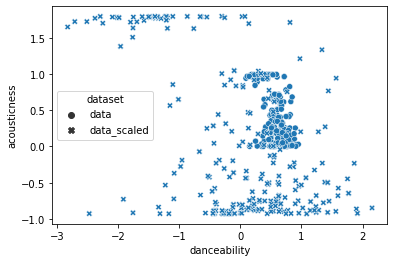

In [ ]:
std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform(data.to_numpy())
data_scaled = pd.DataFrame(data_scaled,columns=['artist','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','speechiness','tempo','mode','valence'])
concatenated = pd.concat([data.assign(dataset='data'), data_scaled.assign(dataset='data_scaled')])
sns.scatterplot(x='danceability', y='acousticness',data=concatenated,style='dataset')
plt.show()
#here we compared the two datasets data and data_scaled

How many classes are there? Plot the distribution of the classes. Is the data balanced or imbalanced?

In [ ]:
print(labels['genre'].value_counts())#number of data per classes
#there's 5 classes with 50 element in each

Rock         50
Rap          50
Country      50
Classical    50
EDM          50
Name: genre, dtype: int64


In [ ]:
#there's 5 classes with 50 element in each so the data is balanced

<Axes: title={'center': 'distribution des genre'}, ylabel='N° de titre concerné'>

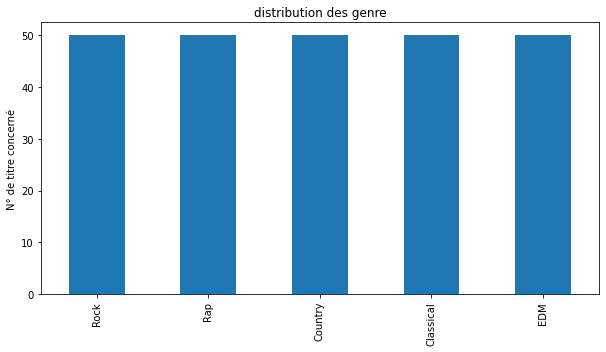

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks([0,1,2,3,4],['Rock','Rap','Country','Classical','EDM'])
plt.ylabel('N° de titre concerné')
plt.title('distribution des genre')
labels['genre'].value_counts().plot(kind='bar')

Encode your classes into a numerical variable.

In [ ]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels
#here the labels are encoded into integers from 0 to 4

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Check if your data and classes are numpy arrays. If that is not the case, transform your data and classes into numpy arrays.

In [ ]:
#Check if the data is numpy array

type(data_scaled)
#The result shows that the datas type is not numpy array

pandas.core.frame.DataFrame

In [ ]:
#Transform the data into numpy array
data_scaled = data_scaled.to_numpy()

#Check if the data is numpy array
type(data_scaled)

numpy.ndarray

In [ ]:
#Check if the classes is numpy array

type(labels)
#The result shows that the classes type is numpy array

numpy.ndarray

### Clustering algorithm 1: K-means

Apply the K-means algorithm with 2 centers. Look at the default parameters the method takes. Make sure the algorithm doesn't run more than 500 iterations.

In [ ]:
kmeans = KMeans(n_clusters=2,max_iter=500)
kmeans.fit(data_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=2)

In [ ]:
kmeans.cluster_centers_

array([[-0.19612563, -0.40282295,  0.30213482, -0.13777827,  0.40363969,
        -0.47767742, -0.00302126,  0.10125718,  0.43235196,  0.07002414,
         0.11029596,  0.01773927,  0.28535302],
       [ 0.82536205,  1.69521325, -1.27148402,  0.57981691, -1.69865036,
         2.0102258 ,  0.01271449, -0.42612398, -1.81948118, -0.29468492,
        -0.46416215, -0.07465278, -1.20086062]])

array([[-0.19612563, -0.40282295,  0.30213482, -0.13777827,  0.40363969,
        -0.47767742, -0.00302126,  0.10125718,  0.43235196,  0.07002414,
         0.11029596,  0.01773927,  0.28535302],
       [ 0.82536205,  1.69521325, -1.27148402,  0.57981691, -1.69865036,
         2.0102258 ,  0.01271449, -0.42612398, -1.81948118, -0.29468492,
        -0.46416215, -0.07465278, -1.20086062]])

What does the max_iter parameter do?

In [ ]:
# The max_iter parameter can be used to set a maximum number of iterations for the quadratic programming problem to cycle through to optimize. The default is -1 , which means there is no limit.

How many samples are in each cluster?

In [ ]:
print(kmeans.labels_)
var = pd.Series(kmeans.labels_).value_counts()
print(var)
#202 elements in cluster 0
#48 elements in cluster 1


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0    202
1     48
dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 

In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

For n_clusters = 2 The average silhouette_score is : 0.37376164621901925
For n_clusters = 3 The average silhouette_score is : 0.1673476059582326
For n_clusters = 4 The average silhouette_score is : 0.1711875443983432
For n_clusters = 5 The average silhouette_score is : 0.12231408725132312
For n_clusters = 6 The average silhouette_score is : 0.13057192679217103
For n_clusters = 7 The average silhouette_score is : 0.13064324598189403
For n_clusters = 8 The average silhouette_score is : 0.17948320926946365
For n_clusters = 9 The average silhouette_score is : 0.13946142207318935
For n_clusters = 10 The average silhouette_score is : 0.143163296963626


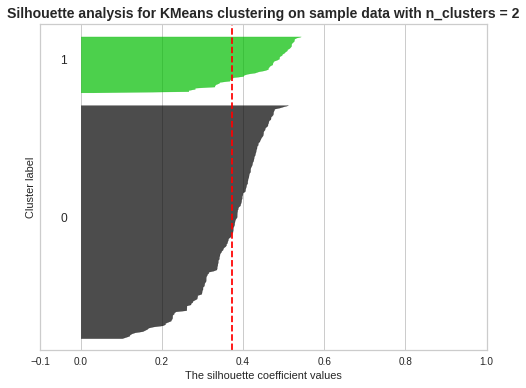

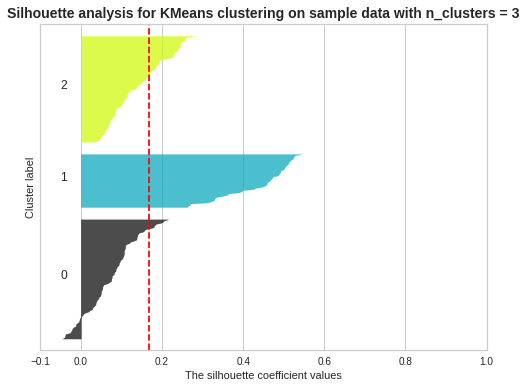

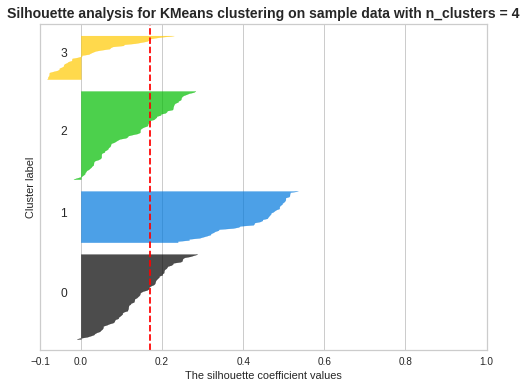

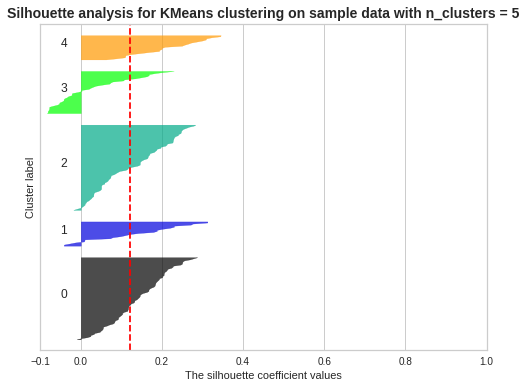

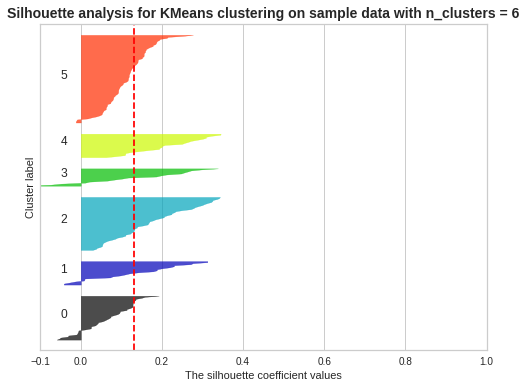

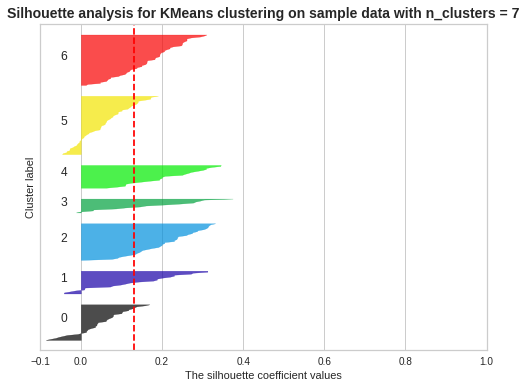

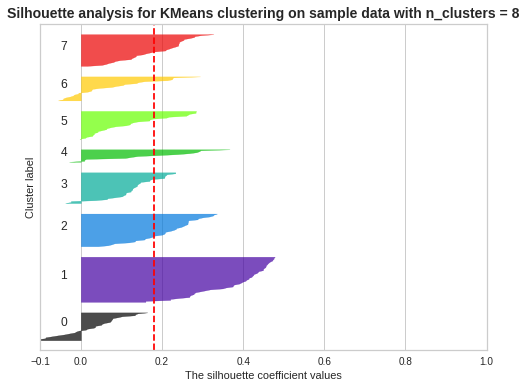

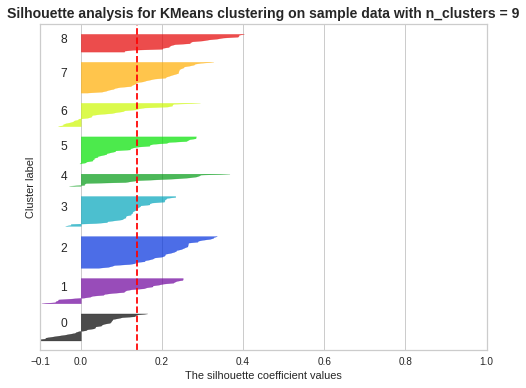

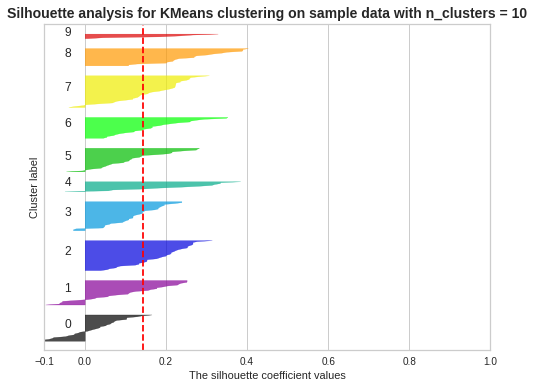

For n_clusters = 2 The average silhouette_score is : 0.37376164621901925
For n_clusters = 3 The average silhouette_score is : 0.1673476059582326
For n_clusters = 4 The average silhouette_score is : 0.1711875443983432
For n_clusters = 5 The average silhouette_score is : 0.12231408725132312
For n_clusters = 6 The average silhouette_score is : 0.13057192679217103
For n_clusters = 7 The average silhouette_score is : 0.13064324598189403
For n_clusters = 8 The average silhouette_score is : 0.17948320926946365
For n_clusters = 9 The average silhouette_score is : 0.13946142207318935
For n_clusters = 10 The average silhouette_score is : 0.143163296963626


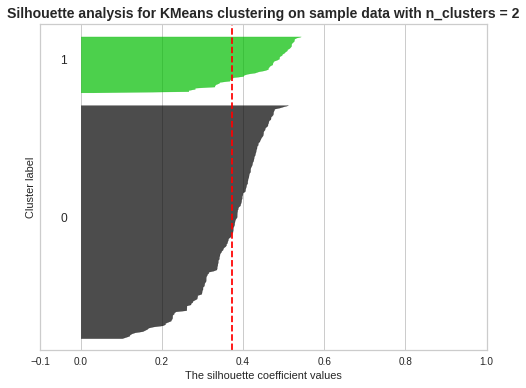

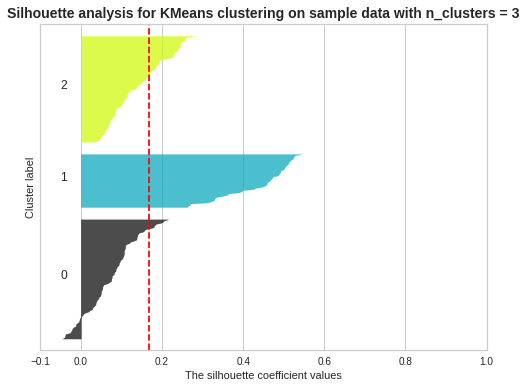

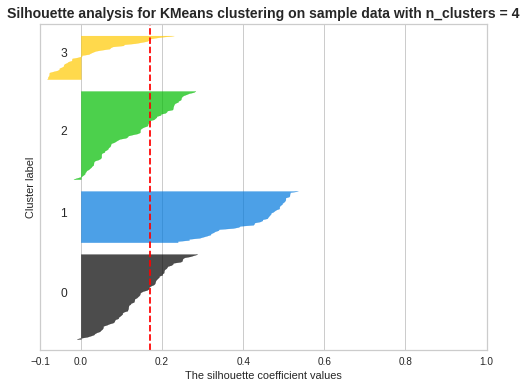

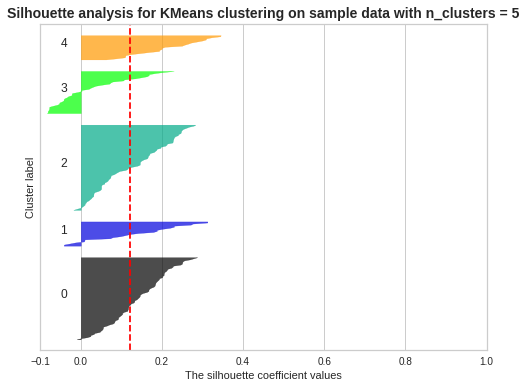

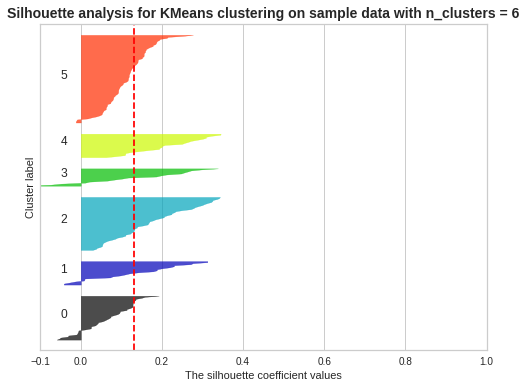

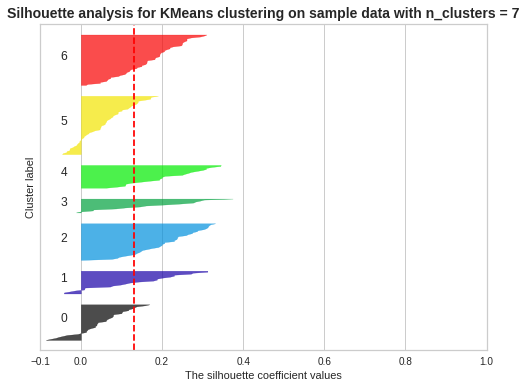

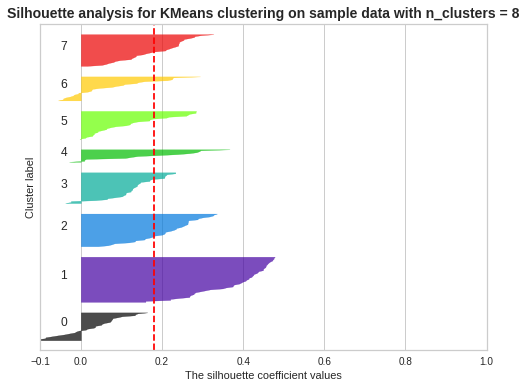

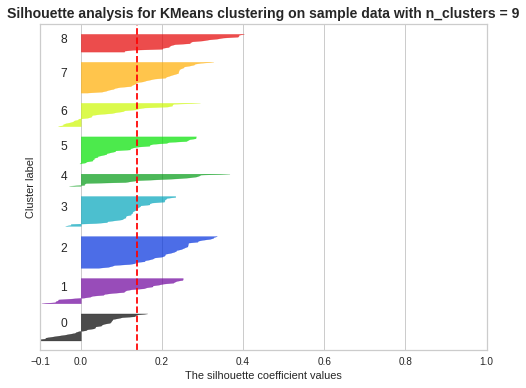

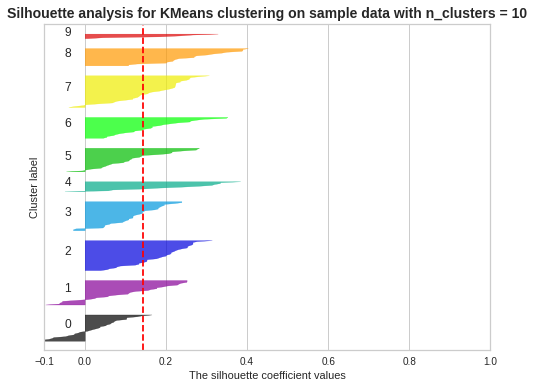

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]   ### TO COMPLETE

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


for n_clusters in range_n_clusters:
    # Create a plot
    fig, ax  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters.
    clusterer = KMeans(n_clusters=n_clusters,n_init="auto",random_state=10) ### TO COMPLETE
    cluster_labels = clusterer.fit_predict(data_scaled) ### TO COMPLETE

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_scaled,cluster_labels) ### TO COMPLETE
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels) ### TO COMPLETE

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

What is, in your opinion, the best number of centers to choose?

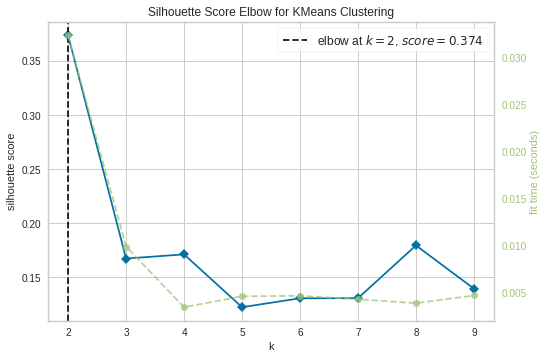

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

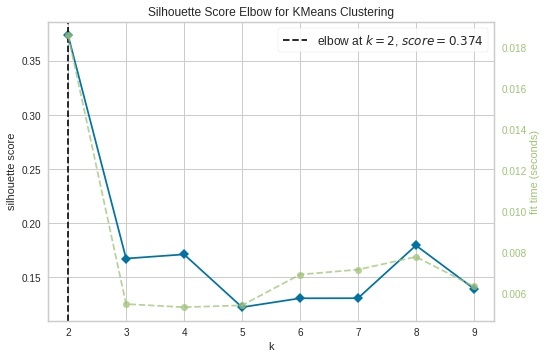

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
visualizer =KElbowVisualizer(clusterer, k=(2,10),metric='silhouette',timings= True)
visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()

#The optimal number of clusters based on Silhouette Score is 2 and because it's the only one with no negatice values

Apply K-means again with the optimal number of centers.

For n_clusters = 2 The average silhouette_score is : 0.37376164621901925


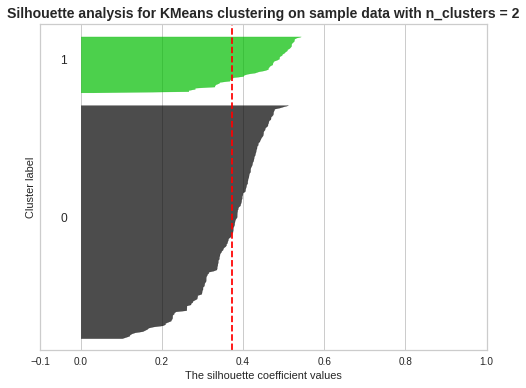

For n_clusters = 2 The average silhouette_score is : 0.37376164621901925


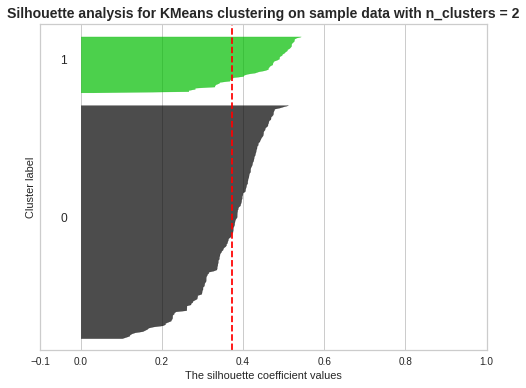

In [ ]:
range_n_clusters = [2]   ### TO COMPLETE

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


for n_clusters in range_n_clusters:
    # Create a plot
    fig1, ax1  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters.
    clusterer1 = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10) ### TO COMPLETE
    cluster_labels1 = clusterer1.fit_predict(data_scaled) ### TO COMPLETE

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg1 = silhouette_score(data_scaled, cluster_labels1) ### TO COMPLETE
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg1)

    # Compute the silhouette scores for each sample
    sample_silhouette_values1 = silhouette_samples(data_scaled, cluster_labels1) ### TO COMPLETE

    y_lower1 = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values1 = \
            sample_silhouette_values1[cluster_labels1 == i]

        ith_cluster_silhouette_values1.sort()

        size_cluster_i = ith_cluster_silhouette_values1.shape[0]
        y_upper1 = y_lower1 + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower1, y_upper1),
                          0, ith_cluster_silhouette_values1,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower1 + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower1 = y_upper1 + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg1, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

How many samples are in each cluster?

In [ ]:
clusterer1.labels_
count1 = pd.Series(clusterer1.labels_).value_counts()
print(count1)
#201 elements in cluster 0
#49 elements in cluster 1

0    201
1     49
dtype: int64
0    201
1     49
dtype: int64


Since, the true class of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
matrix1 = contingency_matrix(labels,clusterer.labels1_)
matrix1
#the matrix shown is the contingency between the original labels and labels obtained as a result of the kmeans clustering with 2 centers

array([[ 1, 49],
       [50,  0],
       [50,  0],
       [50,  0],
       [50,  0]])

array([[ 1, 49],
       [50,  0],
       [50,  0],
       [50,  0],
       [50,  0]])

2- Discuss the obtained matrix

In [ ]:
#we can see that 49 element of label 1 are in cluster 2 and all other elements are in cluster 1

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

In [ ]:
from sklearn import metrics
metrics.rand_score(labels,cluster_labels1)

0.5100722891566265

In [ ]:
metrics.adjusted_rand_score(labels,cluster_labels1)

0.19857313551160127

In [ ]:
metrics.homogeneity_score(labels,cluster_labels1)

0.29525784562787666

In [ ]:
metrics.v_measure_score(labels,cluster_labels1)

0.45165766531282603

In [ ]:
metrics.completeness_score(labels,cluster_labels1)

0.9603727859158294

4- Discuss the obtained scores.

In [ ]:
#for metrics.rand_score:  A score of 0.51 indicates that the algorithm has performed better than random, but there is still significant room for improvement.
# for metrics.adjusted_rand_score : A score of 0.19suggests that the clustering is not very effective, and there is little agreement between the true clusters and the predicted clusters
# for metrics.homogeneity_score : A score of 0.29 indicates that the algorithm is not very successful in identifying homogeneous clusters.
# for metrics.v_measure_score : A score of 0.45 indicates that the algorithm is fairly successful in identifying complete clusters, but the low homogeneity suggests that these clusters may not be very pure.
# for metrics.completeness_score : A score of 0.96 indicates that the algorithm is performing well overall
#while some of the metrics (such as completeness) suggest that the algorithm is performing reasonably well in some respects, the overall picture is not very positive.
 #There is a lot of room for improvement, and it may be necessary to try a different algorithm or tuning the hyperparameters of the current algorithm to obtain better results

### Clustering algorithm 2: Hierarchical clustering

Apply the hierarchical clustering algorithm with 2 centers. Look at the default parameters and make sure the algorithm is based on the single linkage method.

In [ ]:
hclust = AgglomerativeClustering(n_clusters=2, linkage='single')

In [ ]:
hclust.fit(data_scaled)

AgglomerativeClustering(linkage='single')

How many samples are in each cluster?

In [ ]:
hclust.labels_
count2 = pd.Series(hclust.labels_).value_counts()
print(count2)

0    249
1      1
dtype: int64


Apply the hierarchical clustering algorithm again. This time,  change the linkage method to complete linkage.

In [ ]:
hclust2 = AgglomerativeClustering(n_clusters=2, linkage='complete')

In [ ]:
hclust2.fit(data_scaled)

AgglomerativeClustering(linkage='complete')

How many samples are in each cluster?

In [ ]:
hclust2.labels_
count3 = pd.Series(hclust2.labels_).value_counts()
print(count3)

0    202
1     48
dtype: int64


Apply the hierarchical clustering algorithm once again. This time, change the linkage method to ward linkage.

In [ ]:
hclust3 = AgglomerativeClustering(n_clusters=2, linkage='ward')
hclust3.fit(data_scaled)

AgglomerativeClustering()

How many samples are in each cluster?

In [ ]:
hclust3.labels_
count4 = pd.Series(hclust3.labels_).value_counts()
print(count4)

0    202
1     48
dtype: int64


Compare the three results. Is the type of linkage method used important? Which one gave you the best result? For the rest of this section, use the best linkage method.

In [ ]:
#By comparing the three results we can conclude that the type of linkage method used is important because the methods differ in respect to how they define proximity between any two clusters at every step.
# In our case the result we had using the complete linkage is the same obtainted with ward linkage and those results are better than the one we had with single linkage method

In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

For n_clusters = 2 The average silhouette_score is : 0.3764262625665958
For n_clusters = 3 The average silhouette_score is : 0.17298762966925255
For n_clusters = 4 The average silhouette_score is : 0.17674952127593888
For n_clusters = 5 The average silhouette_score is : 0.17756021727362029
For n_clusters = 6 The average silhouette_score is : 0.17200840470297726
For n_clusters = 7 The average silhouette_score is : 0.16994721625390197
For n_clusters = 8 The average silhouette_score is : 0.16952678807319949
For n_clusters = 9 The average silhouette_score is : 0.1791542957207392
For n_clusters = 10 The average silhouette_score is : 0.14599711872618246


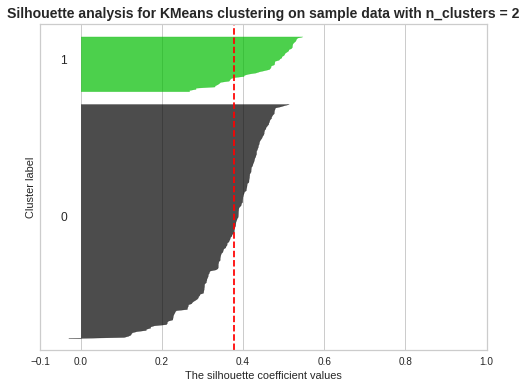

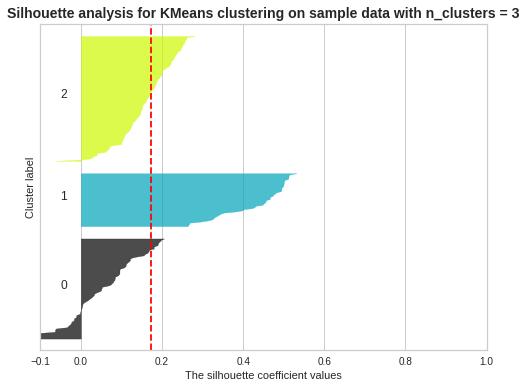

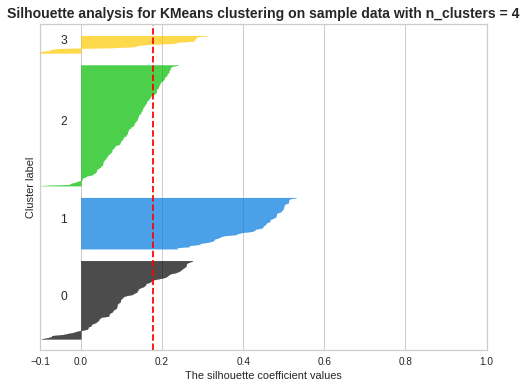

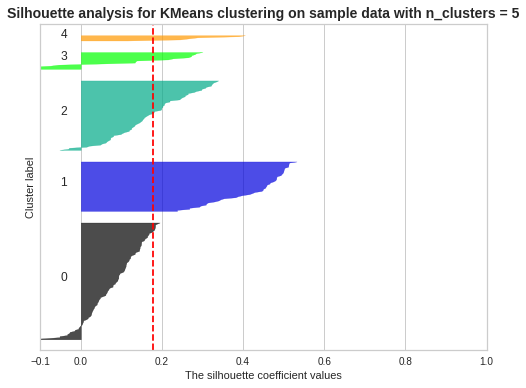

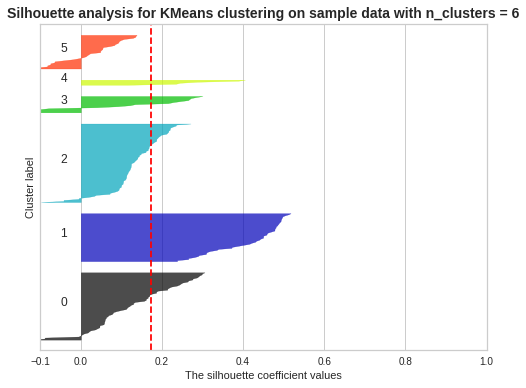

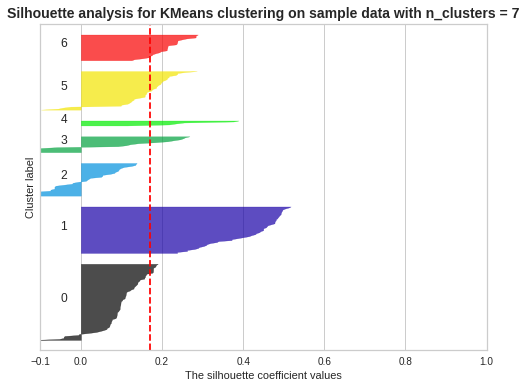

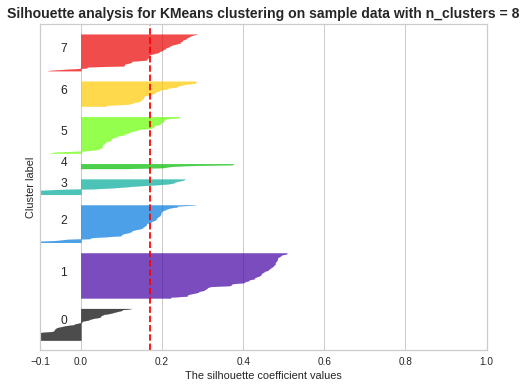

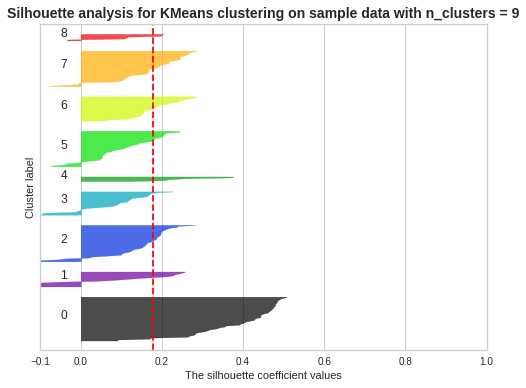

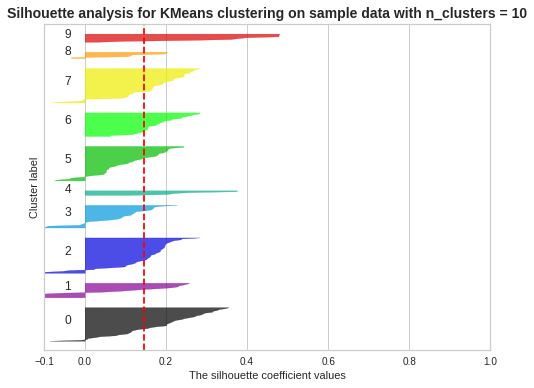

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]   ### TO COMPLETE

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


for n_clusters in range_n_clusters:
    # Create a plot
    fig2, ax2  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax2.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax2.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters.
    clusterer2 = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') ### TO COMPLETE
    cluster_labels2 = clusterer2.fit_predict(data_scaled) ### TO COMPLETE

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg2 = silhouette_score(data_scaled, cluster_labels2) ### TO COMPLETE
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg2)

    # Compute the silhouette scores for each sample
    sample_silhouette_values2 = silhouette_samples(data_scaled, cluster_labels2) ### TO COMPLETE

    y_lower2 = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values2 = \
            sample_silhouette_values2[cluster_labels2 == i]

        ith_cluster_silhouette_values2.sort()

        size_cluster_i = ith_cluster_silhouette_values2.shape[0]
        y_upper2 = y_lower2 + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower2, y_upper2),
                          0, ith_cluster_silhouette_values2,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax2.text(-0.05, y_lower2 + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower2 = y_upper2 + 10  # 10 for the 0 samples

    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax2.axvline(x=silhouette_avg2, color="red", linestyle="--")

    ax2.set_yticks([])  # Clear the yaxis labels / ticks
    ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

What is, in your opinion, the best number of centers to choose?

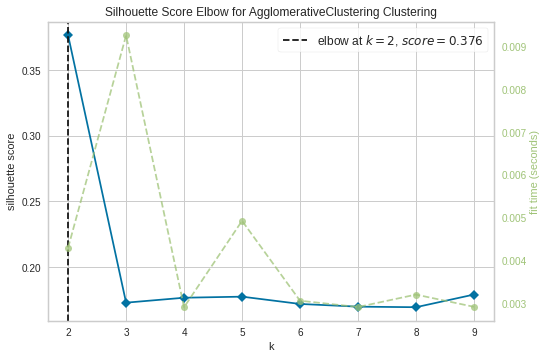

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model2 = AgglomerativeClustering()
# k is range of number of clusters.
visualizer2 = KElbowVisualizer(model2, k=(2,10),metric='silhouette', timings= True)
visualizer2.fit(data_scaled)        # Fit the data to the visualizer
visualizer2.show()

#The optimal number of clusters based on Silhouette Score is 2

Apply hierarchical clustering again with the optimal number of centers.

For n_clusters = 2 The average silhouette_score is : 0.3764262625665958


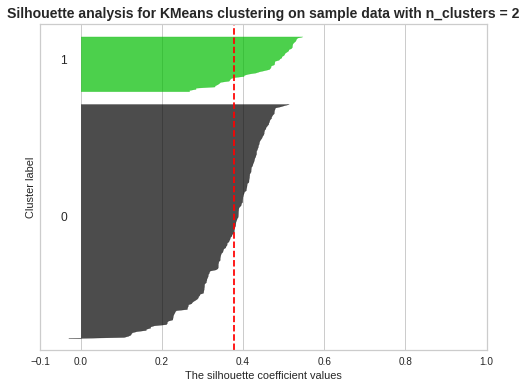

In [ ]:
range_n_clusters = [2]   ### TO COMPLETE

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


for n_clusters in range_n_clusters:
    # Create a plot
    fig3, ax3  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax3.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax3.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters.
    clusterer3 = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') ### TO COMPLETE
    cluster_labels3 = clusterer3.fit_predict(data_scaled) ### TO COMPLETE

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg3 = silhouette_score(data_scaled, cluster_labels3) ### TO COMPLETE
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg3)

    # Compute the silhouette scores for each sample
    sample_silhouette_values3 = silhouette_samples(data_scaled, cluster_labels3) ### TO COMPLETE

    y_lower3 = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values3 = \
            sample_silhouette_values3[cluster_labels3 == i]

        ith_cluster_silhouette_values3.sort()

        size_cluster_i = ith_cluster_silhouette_values3.shape[0]
        y_upper3 = y_lower3 + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax3.fill_betweenx(np.arange(y_lower3, y_upper3),
                          0, ith_cluster_silhouette_values3,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax3.text(-0.05, y_lower3 + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower3 = y_upper3 + 10  # 10 for the 0 samples

    ax3.set_title("The silhouette plot for the various clusters.")
    ax3.set_xlabel("The silhouette coefficient values")
    ax3.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax3.axvline(x=silhouette_avg3, color="red", linestyle="--")

    ax3.set_yticks([])  # Clear the yaxis labels / ticks
    ax3.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

How many samples are in each cluster?

In [ ]:
clusterer3.labels_
count4 = pd.Series(clusterer3.labels_).value_counts()
print(count4)

0    202
1     48
dtype: int64


Since, the true class of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

matrix2 = contingency_matrix(labels,cluster_labels3)
matrix2

array([[ 2, 48],
       [50,  0],
       [50,  0],
       [50,  0],
       [50,  0]])

2- Discuss the obtained matrix.

In [ ]:
#we can see that 48 element of label 1 are in cluster 2 and all other elements are in cluster 1

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

In [ ]:
from sklearn import metrics
metrics.rand_score(labels,clusterer3.labels_)

0.5021365461847389

In [ ]:
metrics.adjusted_rand_score(labels,clusterer3.labels_)

0.1895438345322653

In [ ]:
metrics.v_measure_score(labels,clusterer3.labels_)

0.4341298921547003

In [ ]:
metrics.completeness_score(labels,clusterer3.labels_)

0.9313266384243103

In [ ]:
metrics.homogeneity_score(labels,clusterer3.labels_)

0.283031231712441

4- Discuss the obtained scores.

In [ ]:
# for metrics.rand_score:  A score of 0.502 indicates that the algorithm has performed better than random, but there is still significant room for improvement.
# for metrics.adjusted_rand_score : A score of 0.18 suggests that the clustering is not very effective, and there is little agreement between the true clusters and the predicted clusters
# for metrics.homogeneity_score : A score of 0.28 indicates that the algorithm is not very successful in identifying homogeneous clusters.
# for metrics.v_measure_score : A score of 0.43 indicates that the algorithm is below average in identifying complete clusters, but the low homogeneity suggests that these clusters may not be very pure.
# for metrics.completeness_score : A score of 0.93 indicates that the algorithm is not performing well overall
# while some of the metrics (such as completeness) suggest that the algorithm is performing reasonably well in some respects, the overall picture is not very positive.
# There is a lot of room for improvement, and it may be necessary to try a different algorithm or tuning the hyperparameters of the current algorithm to obtain better results

OPTIONAL: plot the dendrogram

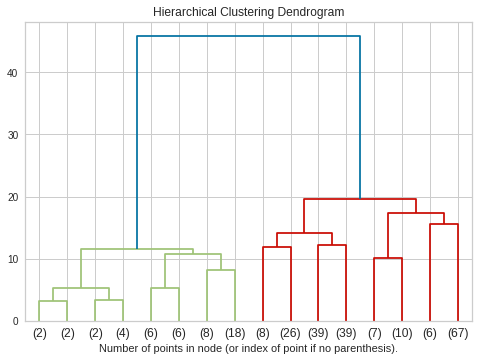

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
modelD = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
modelD = modelD.fit(data_scaled)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(modelD, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## TD3 (part II): Spectral clustering and comparison

### Clustering algorithm 3: Spectral clustering

Apply the spectral clustering algorithm with 2 centers.

In [ ]:
spectralC = SpectralClustering(n_clusters=2,)
spectralC.fit(data_scaled)

SpectralClustering(n_clusters=2)

In [ ]:
print(spectralC.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


How many samples are in each cluster?

In [ ]:
countS1 = pd.Series(spectralC.labels_).value_counts()
print(countS1)

0    202
1     48
dtype: int64


Apply the spectral clustering algorithm again. This time, change the method to construct the affinity matrix to "nearest_neighbors".

In [ ]:
spectralC2 = SpectralClustering(n_clusters=2,  affinity="nearest_neighbors")
spectralC2.fit(data_scaled)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

In [ ]:
spectralC2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

How many samples are in each cluster?

In [ ]:
countS2 = pd.Series(spectralC2.labels_).value_counts()
print(countS2)

0    202
1     48
dtype: int64


Compare the two results. Is the method used to construct the affinity matrix important? Which one gave you the best result? For the rest of this section, use the best method.

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
#methode 1
matrixS1 = contingency_matrix(labels,spectralC.labels_)
print(matrixS1)
#methode 2
matrixS2 = contingency_matrix(labels,spectralC2.labels_)
print(matrixS2)
#there's not really significant change exept if we use the raw data without scaling

[[ 2 48]
 [50  0]
 [50  0]
 [50  0]
 [50  0]]
[[ 2 48]
 [50  0]
 [50  0]
 [50  0]
 [50  0]]


In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

For n_clusters = 2 The average silhouette_score is : 0.3764262625665958
For n_clusters = 3 The average silhouette_score is : 0.3326628457319465
For n_clusters = 4 The average silhouette_score is : 0.27194611525502194
For n_clusters = 5 The average silhouette_score is : 0.22124176216821342
For n_clusters = 6 The average silhouette_score is : 0.146142713350956
For n_clusters = 7 The average silhouette_score is : 0.1367735501328541
For n_clusters = 8 The average silhouette_score is : 0.11440651544524372
For n_clusters = 9 The average silhouette_score is : 0.07854767127553271
For n_clusters = 10 The average silhouette_score is : 0.08393649183710755


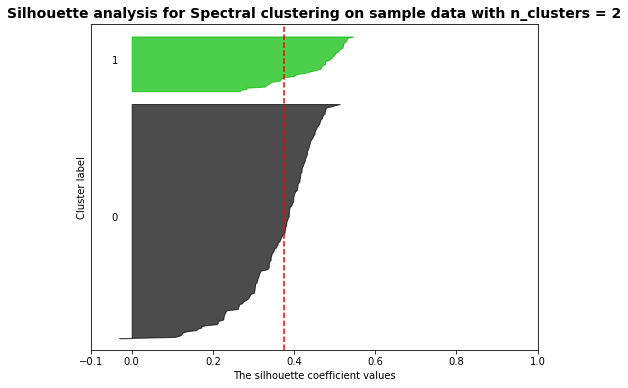

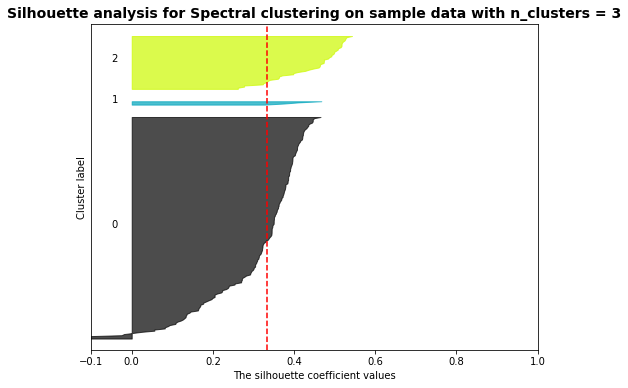

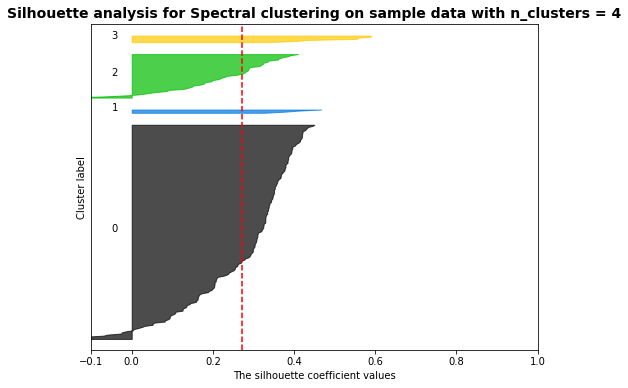

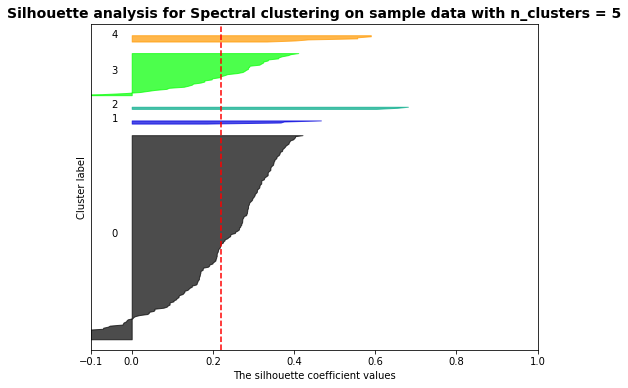

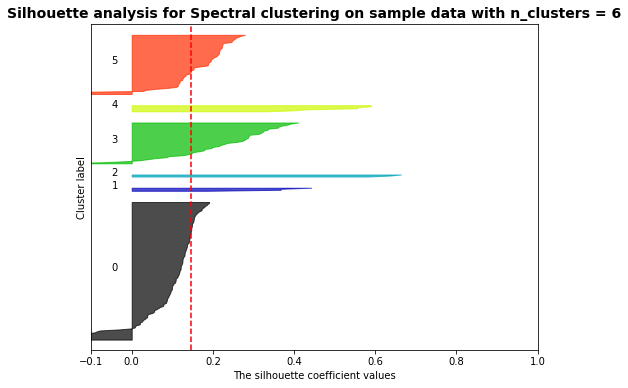

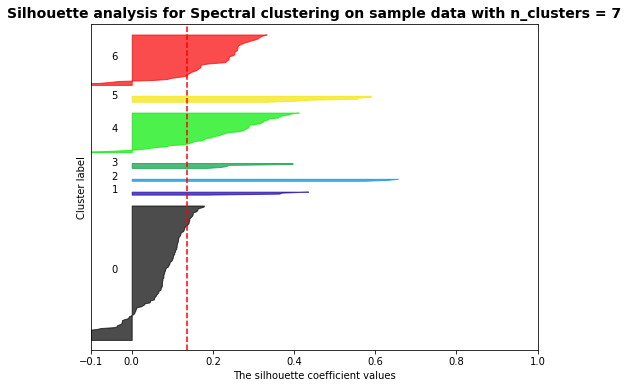

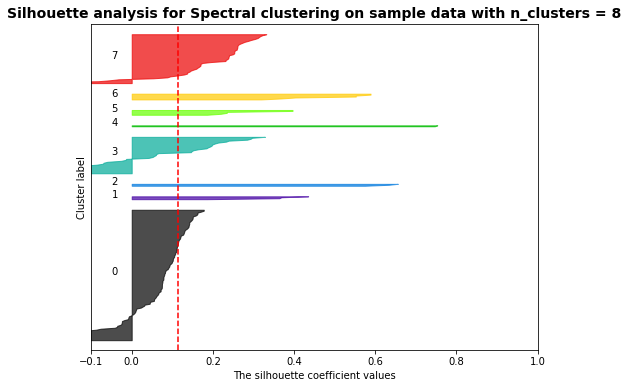

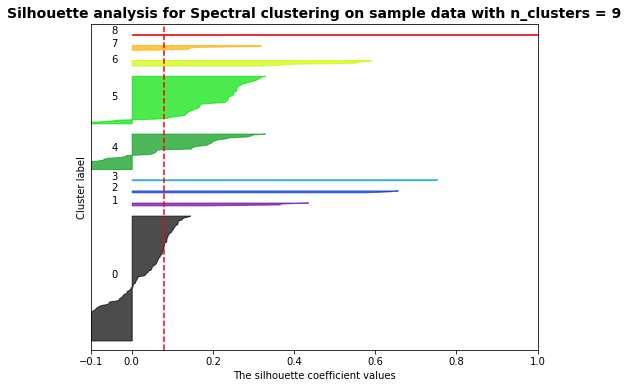

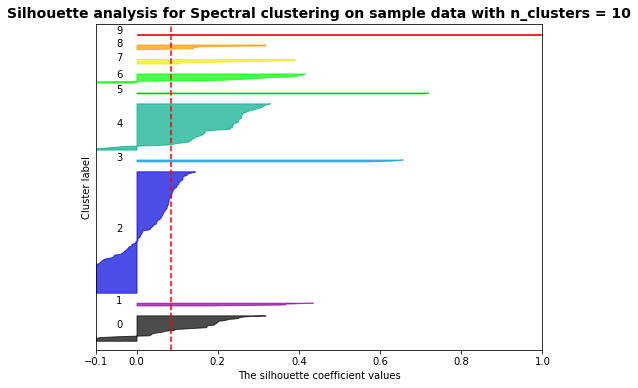

In [ ]:
range_n_clusters =  [2,3,4,5,6,7,8,9,10] ### TO COMPLETE

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


for n_clusters in range_n_clusters:
    # Create a plot
    figS, axS  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    axS.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    axS.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters. Make sure you use the "affinity"
    # method that gave you the best results.
    clustererS =SpectralClustering(n_clusters)  ### TO COMPLETE
    cluster_labels_S=clustererS.fit_predict(data_scaled) ### TO COMPLETE

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg_S =silhouette_score(data_scaled,cluster_labels_S) ### TO COMPLETE
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg_S)

    # Compute the silhouette scores for each sample
    sample_silhouette_values_S = silhouette_samples(data_scaled, cluster_labels_S) ### TO COMPLETE

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
        sample_silhouette_values_S[cluster_labels_S == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axS.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axS.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axS.set_title("The silhouette plot for the various clusters.")
    axS.set_xlabel("The silhouette coefficient values")
    axS.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axS.axvline(x=silhouette_avg_S, color="red", linestyle="--")

    axS.set_yticks([])  # Clear the yaxis labels / ticks
    axS.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for Spectral clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

What is, in your opinion, the best number of centers to choose?

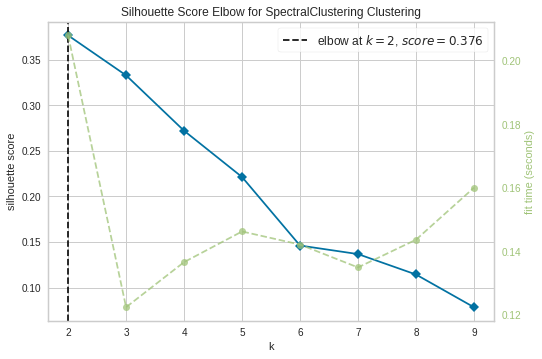

<Axes: title={'center': 'Silhouette Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
visualizer2 = KElbowVisualizer(clustererS, k=(2,10),metric='silhouette', timings= True)
visualizer2.fit(data_scaled)        # Fit the data to the visualizer
visualizer2.show()

#The optimal number of clusters based on Silhouette Score is 2

Apply spectral clustering again with the optimal number of centers.

For n_clusters = 2 The average silhouette_score is : 0.3764262625665958


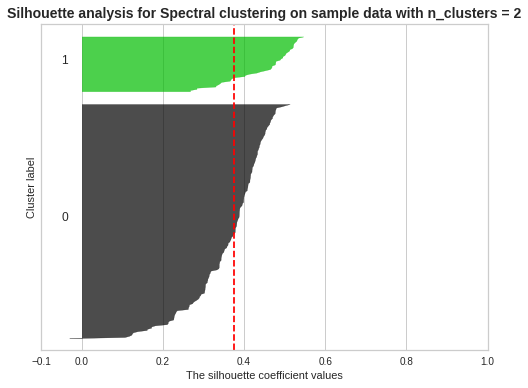

In [ ]:
range_n_clusters =  [2] ### TO COMPLETE

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


for n_clusters in range_n_clusters:
    # Create a plot
    figS2, axS2  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    axS2.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    axS2.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters. Make sure you use the "affinity"
    # method that gave you the best results.
    clustererS2 =SpectralClustering(n_clusters)  ### TO COMPLETE
    cluster_labels_S2  =clustererS2.fit_predict(data_scaled) ### TO COMPLETE

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg_S2 =silhouette_score(data_scaled, cluster_labels_S2) ### TO COMPLETE
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg_S2)

    # Compute the silhouette scores for each sample
    sample_silhouette_values_S2 = silhouette_samples(data_scaled, cluster_labels_S2) ### TO COMPLETE

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values_S2[cluster_labels_S2 == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axS2.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axS2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axS2.set_title("The silhouette plot for the various clusters.")
    axS2.set_xlabel("The silhouette coefficient values")
    axS2.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axS2.axvline(x=silhouette_avg_S2, color="red", linestyle="--")

    axS2.set_yticks([])  # Clear the yaxis labels / ticks
    axS2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for Spectral clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

How many samples are in each cluster?

In [ ]:
countS3 = pd.Series(clustererS2.labels_).value_counts()
print(countS3)

0    202
1     48
dtype: int64


Since, the true label of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
matrix3 = contingency_matrix(labels,clustererS2.labels_)
matrix3

array([[ 2, 48],
       [50,  0],
       [50,  0],
       [50,  0],
       [50,  0]])

2- Discuss the obtained matrix.

In [ ]:
#it looks like there are two groups with one group having a value of 2 in the first column and the other group having a value of 50 in the first column.
#The second column appears to be binary, with one group having a value of 48 and the other having a value of 0.
#However, the contingency matrix provided appears to have two distinct groups, which could potentially make it suitable for spectral clustering.

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

In [ ]:
from sklearn import metrics
metrics.rand_score(labels,clustererS2.labels_)

0.5021365461847389

In [ ]:
metrics.adjusted_rand_score(labels,clustererS2.labels_)

0.1895438345322653

In [ ]:
metrics.homogeneity_score(labels,clustererS2.labels_)

0.283031231712441

In [ ]:
metrics.v_measure_score(labels,clustererS2.labels_)

0.4341298921547003

In [ ]:
metrics.completeness_score(labels,clustererS2.labels_)

0.9313266384243103

4- Discuss the obtained scores.

In [ ]:
#for metrics.rand_score:  A score of 0.502 indicates that the algorithm has performed better than random, but there is still significant room for improvement.
# for metrics.adjusted_rand_score : A score of 0.189 suggests that the clustering is not very effective, and there is little agreement between the true clusters and the predicted clusters
# for metrics.homogeneity_score : A score of 0.283 indicates that the algorithm is not very successful in identifying homogeneous clusters.
# for metrics.v_measure_score : A score of 0.931 indicates that the algorithm is fairly successful in identifying complete clusters, but the low homogeneity suggests that these clusters may not be very pure.
# for metrics.completeness_score : A score of 0.434 indicates that the algorithm is not performing well overall
#while some of the metrics (such as completeness) suggest that the algorithm is performing reasonably well in some respects, the overall picture is not very positive.
#There is a lot of room for improvement, and it may be necessary to try a different algorithm or tuning the hyperparameters of the current algorithm to obtain better results

### Conclusion

In your opinion, which method gave the better results for this dataset?

In [ ]:
#based on the scores output of evaluation metrics we can find that the k-means and hierarchical are giving fairly the same results with a slightly better scores for the k-means

Usually, when we apply different clustering methods, it's because we do not know the classes. In such situation, we compare the different clustering models we obtained with each method to each other to see if they are corroborating.
<br>
Pick two of the three clustering methods used above, and use the same metrics as before to compare them (do not rerun the models, just compare the predicted clusters you obtained with each method).  

In [ ]:
metrics.rand_score(cluster_labels1,clustererS2.labels_)

0.992

In [ ]:
metrics.adjusted_rand_score(cluster_labels1,clustererS2.labels_)

0.9814299906712727

In [ ]:
metrics.homogeneity_score(cluster_labels1,clustererS2.labels_)

0.949024258429027

In [ ]:
metrics.v_measure_score(cluster_labels1,clustererS2.labels_)

0.9545191952627774

In [ ]:
metrics.completeness_score(cluster_labels1,clustererS2.labels_)

0.9600781350482452

Discuss the obtained scores.

In [ ]:
#as said before the results of each method are slightly different but really close so it's logical that these results tend to 1

At the beginning of the practical, you noticed the number of classes in the data. After completing all the work, applying silhouette and finding the optimal number of clusters, were you expecting the results you obtained? Can you find an explanation for the result?

In [ ]:
#we had 5 classes in the beggining with the raw data and 2 clusters after treatement so no we were not expecting the results as an explanation we can say that
#It's difficult to predict the results of a clustering analysis beforehand, as they depend on the characteristics of the data and the algorithm used.
#However, if the optimal number of clusters is found to be significantly different from the initial number of classes, it may indicate that the original
#class labels were not informative enough or that the data had underlying substructures that were not captured by the initial class labels.